# Echoes of Change: Analyzing Social Media Sentiment on Climate Action
Akshat Tirumalai  
July 24, 2024

# Introduction

### Project Overview
Climate activism has been a contentious topic for many years. There are many who support efforts to protect the planet, and others who are opposed to such policies. This project aims to explore the collective sentiment towards climate change and efforts to save the planet by analyzing tweets over several years. By leveraging sentiment analysis techniques, this study seeks to uncover trends in public opinion and how these sentiments have evolved over time.

### Research Question
The central question is: **"How has public sentiment towards climate action evolved over time, as expressed through social media?"** The focus is on assessing the positive, negative, and neutral sentiments in tweets related to climate change and environmental efforts.

### Motivation
The urgency of addressing climate change and the significant role of public opinion in influencing policy and action motivate this study. Insights into public sentiment can aid policymakers, activists, and organizations in promoting environmental sustainability. Social media provides a rich data source for understanding these sentiments.

### Prior Related Work
Previous studies have employed sentiment analysis on social media data to track public opinion on various topics. In the context of climate change, research has shown social media's ability to reflect public engagement with environmental issues. This project builds on these foundations by offering a temporal analysis of climate sentiment, highlighting shifts in opinions over time.

By analyzing a substantial dataset of tweets, the project aims to enhance the understanding of public sentiment dynamics regarding climate action, offering valuable insights for future initiatives to combat climate change.

### Data Source
The dataset and its documentation can be accessed on Kaggle: [Social Media Sentiment and Climate Change Dataset](https://www.kaggle.com/datasets/thedevastator/social-media-sentiment-and-climate-change?select=nltk_split.csv).

# Methods

### Importing and Organizing the Data

In [23]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import display
import networkx as nx
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
import numpy as np

In [24]:
# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Explanation of Data and Analytical Process
The data for this analysis comes from a large dataset of user tweets related to climate change. The text data will be preprocessed to remove URLs, punctuation, and convert to lowercase to ensure consistency. Tokenization will then be performed to break down the text into individual words, followed by removing stopwords and lemmatization to reduce words to their base forms. 

These steps are crucial because they reduce the variability in the text data, allowing for more accurate sentiment classification and trend analysis by treating different forms of a word as a single item.

In [25]:
# Load the dataset
file_path = '/home/jovyan/DH140-Blog/posts/Dataset.csv'
data = pd.read_csv(file_path)

In [26]:
# Data Preparation
data = data[['id', 'text', 'favorite_count', 'retweet_count', 'created_at']]
data.dropna(subset=['text'], inplace=True)
data.drop_duplicates(subset='text', inplace=True)

In [27]:
# Preprocess text: remove URLs, punctuation, and convert to lowercase
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\brt\b', '', text)  # Remove 'rt'
    return text

data['clean_text'] = data['text'].apply(preprocess_text)
data['created_at'] = pd.to_datetime(data['created_at']).dt.year

In [28]:
# Tokenization
data['tokens'] = data['clean_text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
lemmatizer = WordNetLemmatizer()
data['tokens'] = data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

Now, I can conduct sentiment analysis using the VADER tool to classify the sentiment of each tweet as positive, negative, or neutral.

In [29]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['pos'], scores['neg'], scores['neu'], scores['compound']

data[['positive_score', 'negative_score', 'neutral_score', 'compound_score']] = data['clean_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['overall_sentiment'] = data['compound_score'].apply(classify_sentiment)

# Results 

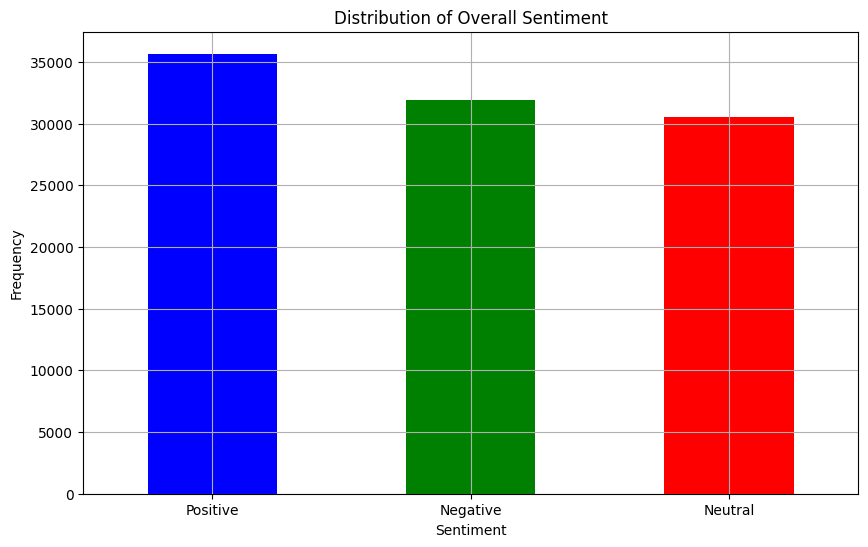

In [30]:
# Plot the distribution of overall sentiment
plt.figure(figsize=(10, 6))
data['overall_sentiment'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Distribution of Overall Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

The bar chart above illustrates the overall sentiment distribution in the dataset, categorizing tweets related to climate action as Positive, Negative, or Neutral. Key insights from the chart include:

1. **Positive Sentiment Dominance:** The majority of tweets are Positive, indicating widespread support or optimism towards climate action. This suggests significant approval of climate initiatives and acknowledgment of positive steps taken towards environmental sustainability.

2. **Balanced Negative and Neutral Sentiments:** The frequencies of Negative and Neutral tweets are also notable, though slightly lower than Positive tweets. The substantial number of Negative tweets highlights critical voices or concerns about climate action, indicating dissatisfaction or skepticism among certain groups. 

Overall, the high counts of Positive, Negative, and Neutral tweets indicate that climate action is a significant topic on social media, engaging a broad audience. This engagement is crucial for driving public awareness and fostering collective action towards addressing climate issues.


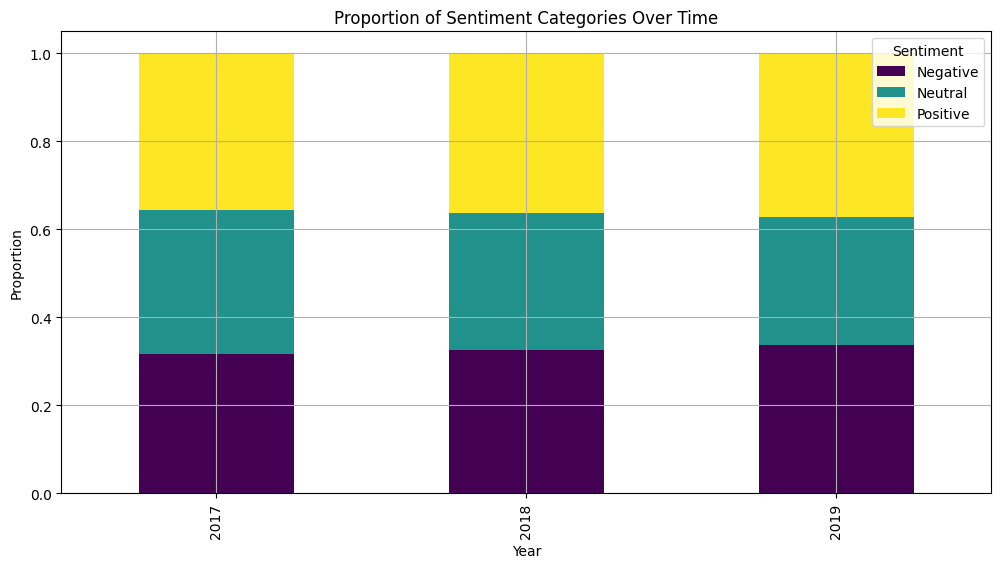

In [31]:
# Proportion of Sentiment Categories Over Time
sentiment_proportion = data.groupby(['created_at', 'overall_sentiment']).size().unstack(fill_value=0)
sentiment_proportion = sentiment_proportion.div(sentiment_proportion.sum(axis=1), axis=0)

# Plot the proportion of sentiment categories over time
sentiment_proportion.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Proportion of Sentiment Categories Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

The stacked bar chart above illustrates the proportion of tweets classified as Positive, Negative, and Neutral over the years 2017, 2018, and 2019. This visualization reveals the evolution of sentiment distribution towards climate action over these years.

1. **Consistency in Sentiment Proportions:** The chart shows a relatively consistent distribution of sentiment categories across the three years. Each year, Positive tweets make up the largest proportion, followed by Negative and then Neutral tweets. This suggests that public sentiment towards climate action has remained relatively stable over this period, with a predominant inclination towards positive discussions.

It surprised me that despite significant scientific breakthroughs and increasing urgency to save the planet, the positive sentiment of the public has not shown a substantial increase over the years, as evidenced by the consistent proportions in the graph.

2. **Stable Neutral and Negative Sentiments:** The persistent proportion of Neutral tweets suggests that a considerable segment of the public continues to discuss climate action in an informative or balanced manner, without strong emotional leanings. This reflects ongoing engagement with factual or objective discourse. Similarly, the stable proportion of Negative tweets indicates that critical perspectives and dissatisfaction with climate initiatives remain a constant part of the conversation. This stability in Neutral and Negative sentiments implies that while public support for climate action is strong, there are enduring concerns and a consistent demand for more effective solutions and transparency in addressing climate change.


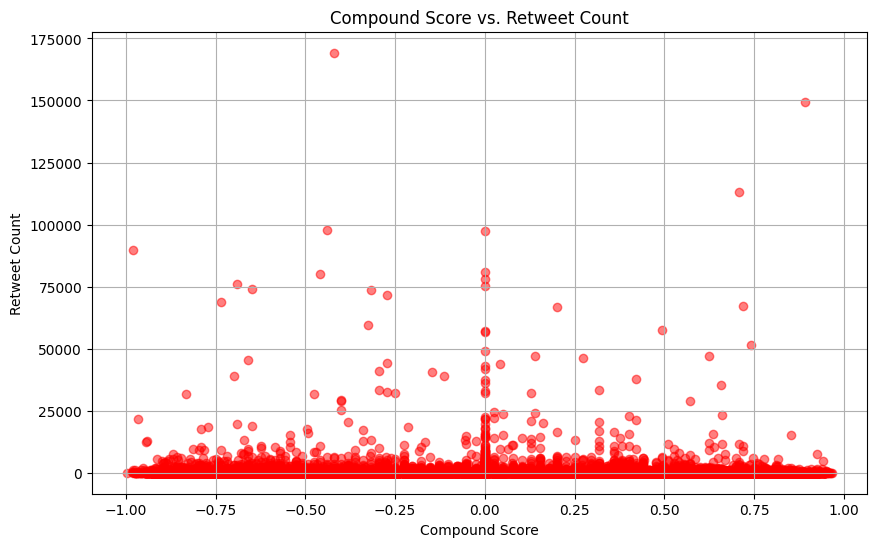

In [32]:
# Scatter plot of compound score vs. retweet count
plt.figure(figsize=(10, 6))
plt.scatter(data['compound_score'], data['retweet_count'], alpha=0.5, color='red')
plt.title('Compound Score vs. Retweet Count')
plt.xlabel('Compound Score')
plt.ylabel('Retweet Count')
plt.grid(True)
plt.show()

From the plot, it is evident that there is no strong linear correlation between sentiment and retweet count, as tweets with various sentiment scores (ranging from highly negative to highly positive) can receive high retweet counts. However, several observations can be made:

1. **Higher Density for Neutral or Slightly Positive Sentiments:** Tweets with neutral or slightly positive sentiments tend to have a higher density of retweets in the lower to middle ranges. This suggests that neutral or moderately positive content might be more widely accepted and shared.

Interestingly enough, some tweets with extreme sentiment scores (both positive and negative) achieve high retweet counts. This indicates that strongly opinionated tweets, regardless of their positivity or negativity, can resonate deeply with certain audiences and provoke significant engagement. 

This pattern could reflect the polarizing nature of climate action discussions, where strong opinions (either for or against) can generate considerable public interaction.

While discussing public climate actions, a retweet network graph proves to be a powerful tool for understanding the dynamics of information dissemination and influence on social media, especially in the context of climate action. By visualizing the connections between users based on retweet relationships, we can identify key influencers, understand how information spreads, and uncover the structure of the conversation around climate change.

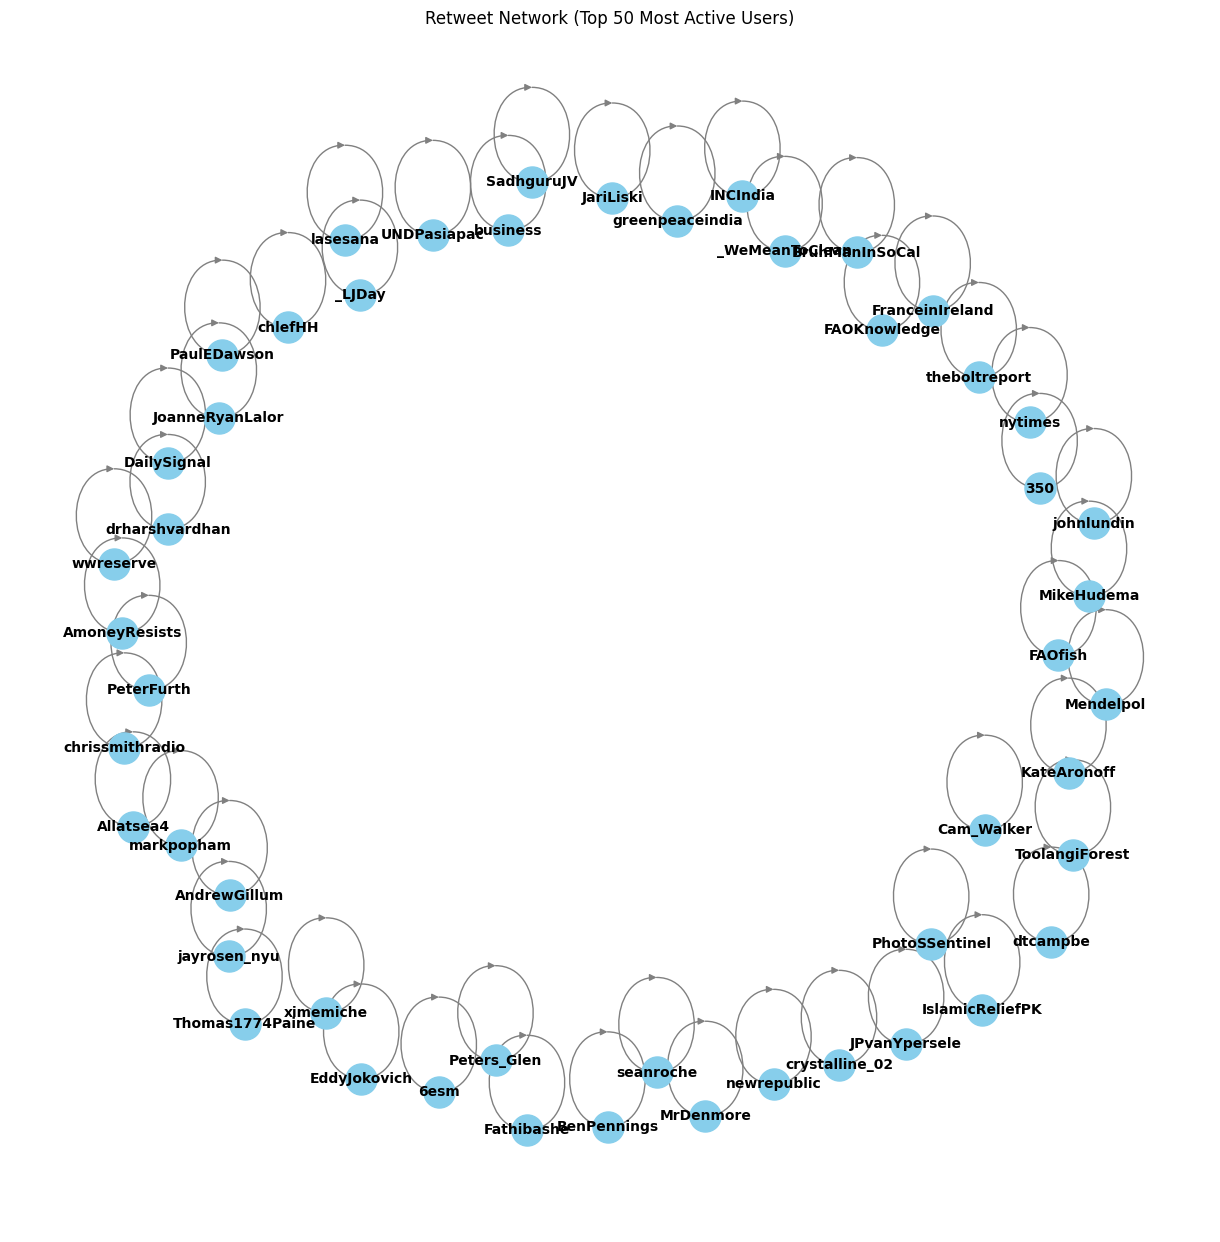

In [33]:
# Retweet Network Graph
def extract_retweet_user(text):
    match = re.findall(r'RT @(\w+):', text)
    return match[0] if match else None

def extract_original_user(text):
    match = re.findall(r'@(\w+)', text)
    return match[0] if match else None

data['retweet_user'] = data['text'].apply(extract_retweet_user)
data['original_user'] = data['text'].apply(extract_original_user)
retweet_data = data.dropna(subset=['retweet_user'])

G = nx.DiGraph()

for index, row in retweet_data.iterrows():
    G.add_edge(row['retweet_user'], row['original_user'])

degree_dict = dict(G.degree(G.nodes()))
most_active_users = sorted(degree_dict, key=degree_dict.get, reverse=True)[:50]
G_sub = G.subgraph(most_active_users)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_sub, k=0.3)
nx.draw(G_sub, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', font_size=10, font_color='black', font_weight='bold')
plt.title('Retweet Network (Top 50 Most Active Users)')
plt.show()


The graph illustrates the retweet network among the top 50 most active users, based on their degree centrality. Each node represents a user, and each directed edge represents a retweet relationship from one user to another. The size of the nodes is proportional to their degree centrality, indicating how many connections (both incoming and outgoing) a user has. Users with more connections are more central in the network, suggesting they have a higher influence in spreading information.

1. **Uniform Distribution of Engagement:** The retweet network reveals that there are no overly networked individuals; instead, most users have a similar number of retweets, indicating a uniform distribution of engagement. This suggests that the climate action discussion on Twitter is supported by a broad base of active participants rather than being dominated by a few key influencers.

2. **Active Engagement and Dissemination:** The tightness of the network, with closely connected nodes and numerous retweet relationships, signifies active engagement and widespread dissemination of climate action messages. This cohesive structure points to a highly mobilized and engaged community that effectively spreads information, raises awareness, and drives collective action towards climate advocacy (regardless of whether the advocacy is positive or negative).

3. **Potential for Significant Impact:** The uniform retweet activity and strong community dynamics underscore the potential for significant impact as messages are rapidly and efficiently shared within this resilient network.

Overall, the graph highlights a robust and interconnected community actively participating in climate action discussions, facilitating widespread and effective communication of climate-related messages.


### Predicting Future Sentiment

Using past data, we will employ linear regression to predict future sentiment trends. Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. In this case, we will use the average compound sentiment scores from previous years as our dependent variable and the corresponding years as our independent variable.

By fitting a linear regression model to the historical sentiment data, we can observe the trend and make predictions about future sentiment towards climate activism. This approach allows us to estimate how public sentiment towards climate action might evolve in the coming years. The predictions will provide insights into potential shifts in public opinion, helping policymakers, activists, and organizations anticipate and respond to future trends in climate action sentiment.


,year,predicted_compound_score
0,2020,0.011622
1,2021,0.012500
2,2022,0.013378
3,2023,0.014256
4,2024,0.015133
5,2025,0.016011
6,2026,0.016889


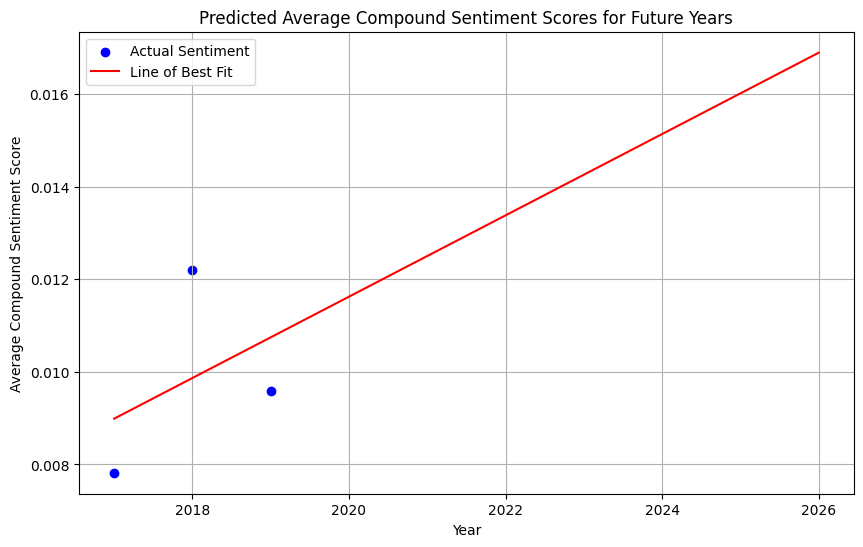

In [34]:
# Predicting Future Sentiment
avg_sentiment_per_year = data.groupby('created_at')['compound_score'].mean().reset_index()
avg_sentiment_per_year.columns = ['year', 'average_compound_score']

X = avg_sentiment_per_year['year'].values.reshape(-1, 1)
y = avg_sentiment_per_year['average_compound_score'].values
model = LinearRegression()
model.fit(X, y)

# Define future years
future_years = np.array([2020, 2021, 2022, 2023, 2024, 2025, 2026]).reshape(-1, 1)

# Predict future sentiment scores
future_sentiment_scores = model.predict(future_years)

# Combine hitorical and future data for a continuous line plot
all_years = np.concatenate((X, future_years))
all_scores = np.concatenate((model.predict(X), future_sentiment_scores))

# Display the predicted sentiment scores
future_predictions = pd.DataFrame({'year': future_years.flatten(), 'predicted_compound_score': future_sentiment_scores})
display(future_predictions)

# Plot the predicted future sentiment scores with a single line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Sentiment')
plt.plot(all_years, all_scores, color='red', label='Line of Best Fit')
plt.title('Predicted Average Compound Sentiment Scores for Future Years')
plt.xlabel('Year')
plt.ylabel('Average Compound Sentiment Score')
plt.legend()
plt.grid(True)
plt.show()

The graph above illustrates the forecast of the average compound sentiment scores over time, using a linear regression model. The linear regression model predicts a gradual increase in the average compound sentiment scores over the next few years, with all scores being positive. This suggests that public sentiment towards climate action is only expected to become more positive values. Although the actual data points show some variation around the trend line, indicating yearly fluctuations, the overall upward trend suggests a more optimistic outlook for future sentiment.

This predicted increase in positive sentiment is encouraging for climate action advocates, as it indicates growing public support for climate initiatives. Policymakers and activists can use this information to plan their strategies more effectively, leveraging the anticipated increase in positive sentiment to introduce more ambitious climate policies and initiatives. While the forecast is optimistic, it remains crucial to continue monitoring sentiment trends to ensure that this positive trajectory is maintained. By understanding and anticipating these trends, climate advocates can push forward with confidence, knowing that public sentiment is likely to favor their efforts in the coming years.

# Discussion & Conclusion

The analysis of public sentiment towards climate action using social media data reveals several key insights:

1. **Consistent Positive Sentiment:** There is a generally positive sentiment towards climate action, with a majority of tweets expressing support or optimism toward preserving the environment. This sentiment has remained stable over the years, indicating consistent public engagement with climate-related topics.

2. **Balanced Sentiment Distribution:** While positive sentiment is predominant, there are also proportions of negative and neutral tweets. This reflects the complexity of the issue of climate action policies, with both supportive and critical voices.

3. **Future Sentiment Trends:** Forecasting future trends using linear regression suggests a gradual increase in positive sentiment over the next few years. This indicates growing public support for climate initiatives, encouraging policymakers and activists to introduce more ambitious policies and actions.

These insights highlight robust and growing support for climate action, empowering stakeholders to leverage this positive momentum for transformative environmental progress and a more sustainable future.